#  <span style="color:cyan">CARBON EMISSION</span>
<span style="color:orange">**2024 Tidytuesday  Week 21** </span>

## Setup

### Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os

In [112]:
from matplotlib import rcParams
from matplotlib import font_manager

font_dirs =  ['/Library/Fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)


rcParams['font.family'] = 'Press Start 2P'
rcParams['font.family'] = 'JuliaMono'
rcParams['font.family'] = 'Roboto'

In [87]:
font_files

['/Library/Fonts/JuliaMono-Medium.ttf',
 '/Library/Fonts/GrenzeGotisch-ExtraBold.ttf',
 '/Library/Fonts/Pally-Regular.otf',
 '/Library/Fonts/Boska-BlackItalic.otf',
 '/Library/Fonts/Iosevka-Medium.ttc',
 '/Library/Fonts/Roboto-Bold.ttf',
 '/Library/Fonts/RobotoCondensed-Light.ttf',
 '/Library/Fonts/JuliaMono-Regular.ttf',
 '/Library/Fonts/GrenzeGotisch-SemiBold.ttf',
 '/Library/Fonts/JuliaMono-BlackItalic.ttf',
 '/Library/Fonts/RobotoCondensed-Regular.ttf',
 '/Library/Fonts/JuliaMono-Light.ttf',
 '/Library/Fonts/Font Awesome 6 Free-Solid-900.otf',
 '/Library/Fonts/Roboto-Light.ttf',
 '/Library/Fonts/Iosevka-Thin.ttc',
 '/Library/Fonts/GrenzeGotisch-ExtraLight.ttf',
 '/Library/Fonts/Tabular-Medium.otf',
 '/Library/Fonts/Boska-Regular.otf',
 '/Library/Fonts/JuliaMono-MediumItalic.ttf',
 '/Library/Fonts/Roboto-Medium.ttf',
 '/Library/Fonts/Tabular-Regular.otf',
 '/Library/Fonts/mononoki-Regular.otf',
 '/Library/Fonts/JuliaMono-BoldItalic.ttf',
 '/Library/Fonts/Amiko-Regular.ttf',
 '/Libra

### Data

In [6]:
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/'
dat = 'data/2024/2024-05-21/emissions.csv'
dfr = pd.read_csv(url + dat)

## EDA

### Overview

In [ ]:
dfr.head(3)

In [5]:
dfr.columns

Index(['year', 'parent_entity', 'parent_type', 'commodity', 'production_value',
       'production_unit', 'total_emissions_MtCO2e'],
      dtype='object')

In [13]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12551 entries, 0 to 12550
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    12551 non-null  int64  
 1   parent_entity           12551 non-null  object 
 2   parent_type             12551 non-null  object 
 3   commodity               12551 non-null  object 
 4   production_value        12551 non-null  float64
 5   production_unit         12551 non-null  object 
 6   total_emissions_MtCO2e  12551 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 686.5+ KB


### Data wrangling with Data wrangler

In [32]:
dfr.head()

,year,parent_entity,parent_type,commodity,production_value,production_unit,total_emissions_MtCO2e
0,1962,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,0.91250,Million bbl/yr,0.363885
1,1962,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,1.84325,Bcf/yr,0.134355
2,1963,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,1.82500,Million bbl/yr,0.727770
3,1963,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,4.42380,Bcf/yr,0.322453
4,1964,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,7.30000,Million bbl/yr,2.911079


### Renaming columns

In [26]:
df = dfr.rename(
    columns={
        'parent_entity':'entity',
        'parent_type':'type',
        'total_emissions_MtCO2e':'emission',
        'production_value':'value',
        'production_unit':'unit'
        })

### Analysis

In [27]:
df.value_counts('type')

type
Investor-owned Company    6583
State-owned Entity        3914
Nation State              2054
Name: count, dtype: int64

In [30]:
df.value_counts('commodity')

commodity
Oil & NGL              3733
Natural Gas            3452
Bituminous Coal        1370
Metallurgical Coal     1073
Lignite Coal           1008
Sub-Bituminous Coal     673
Thermal Coal            611
Anthracite Coal         368
Cement                  263
Name: count, dtype: int64

In [31]:
df.value_counts('year')

year
2022    238
2021    238
2018    237
2019    236
2020    235
       ... 
1860      3
1861      3
1862      3
1863      3
1854      3
Name: count, Length: 169, dtype: int64

In [33]:
df.value_counts('unit')

unit
Million tonnes/yr     5103
Million bbl/yr        3733
Bcf/yr                3452
Million Tonnes CO2     263
Name: count, dtype: int64

### Aggregation

#### Emission by year

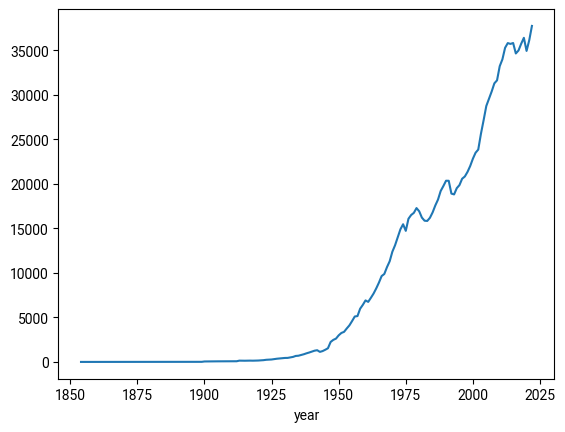

In [204]:
df.groupby('year')['emission'].sum().plot()
plt.show()

In [47]:
commodity_by_year = df.groupby(['year', 'commodity'])['emission'].sum().reset_index()
commodity_by_year

,year,commodity,emission
0,1854,Bituminous Coal,0.015015
1,1854,Lignite Coal,0.015031
2,1854,Sub-Bituminous Coal,0.069152
3,1855,Bituminous Coal,0.019525
4,1855,Lignite Coal,0.019546
...,...,...,...
1219,2022,Metallurgical Coal,2529.699563
1220,2022,Natural Gas,7768.151843
1221,2022,Oil & NGL,10742.756414
1222,2022,Sub-Bituminous Coal,1960.654358


#### Emission by year and commodity

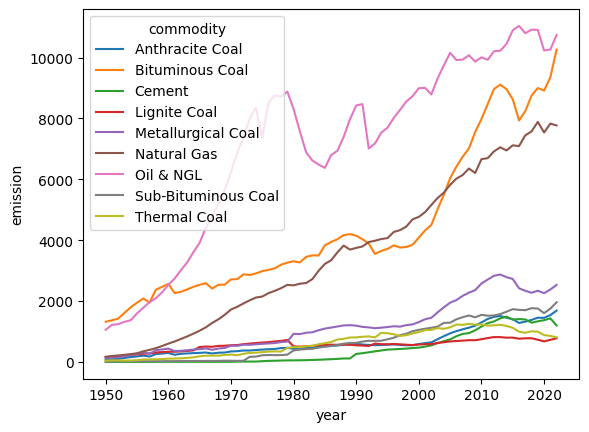

In [46]:
sns.lineplot(
    commodity_by_year[commodity_by_year.year > 1949], x = 'year', y = 'emission', hue = 'commodity')
plt.show()

#### Emission by country

In [55]:
df_country = df[df.loc[:, 'type'] == 'Nation State']
df_country.loc[:, 'entity'] = np.where(
    df_country.loc[:, 'entity'] == 'China (Coal)', 'China', 
    np.where(df_country.loc[:, 'entity'] == 'China (Cement)', 'China', 
             np.where(df_country.loc[:, 'entity'] == 'Former Soviet Union', 'USSR', 
                      np.where(
                          df_country.loc[:, 'entity'] == 'Russian Federation', 
                          'Russia', 
                          df_country.loc[:, 'entity'])
             )
    )
)
df_country.value_counts('entity')

entity
USSR              456
Poland            416
China             407
Russia            155
North Korea       140
Kazakhstan        124
Czechoslovakia    123
Ukraine           113
Czech Republic     90
Slovakia           30
Name: count, dtype: int64

<Axes: ylabel='entity'>

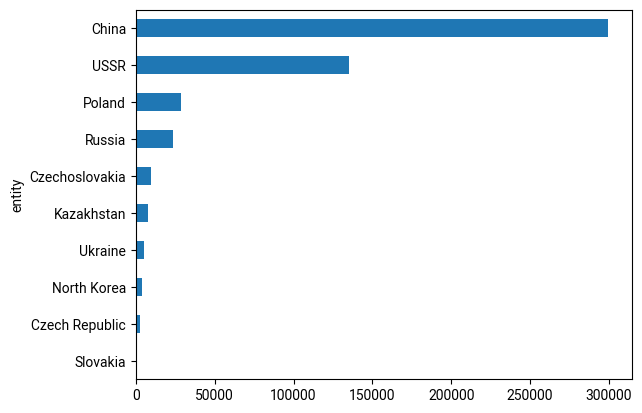

In [113]:
country_emission = df_country.groupby('entity')['emission'].sum().sort_values()
country_emission.plot(kind = 'barh')

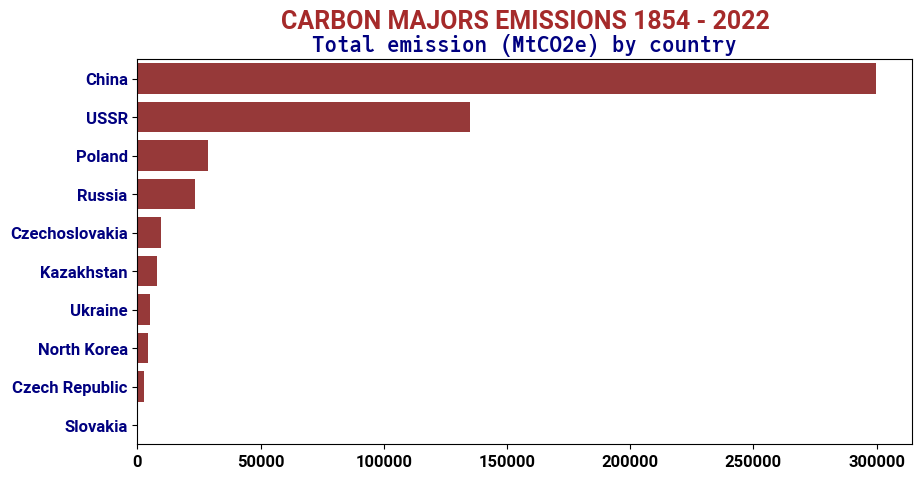

In [135]:
country_emission_sorted = country_emission.reset_index().sort_values('emission', ascending=False)

fig, ax = plt.subplots(figsize=(10, 5))
mid = (fig.subplotpars.right + fig.subplotpars.left)/2

sns.barplot(country_emission_sorted, y = 'entity', x = 'emission', color = 'brown')

ax.set_ylabel('')
ax.set_xlabel('')
#ax.set(frame_on=False)
#plt.tight_layout() 

plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold", color = 'navy')

fig.suptitle("CARBON MAJORS EMISSIONS 1854 - 2022", 
             size=18, x=mid, color = 'brown', weight='bold', family = 'Roboto')
ax.set_title('Total emission (MtCO2e) by country', 
             color = 'navy', font = 'JuliaMono', fontsize = 15, weight = 'bold')
plt.show()


#### Emission by entity

In [139]:
entity_df = df[df.loc[:, 'type'] == 'State-owned Entity']

<Axes: ylabel='entity'>

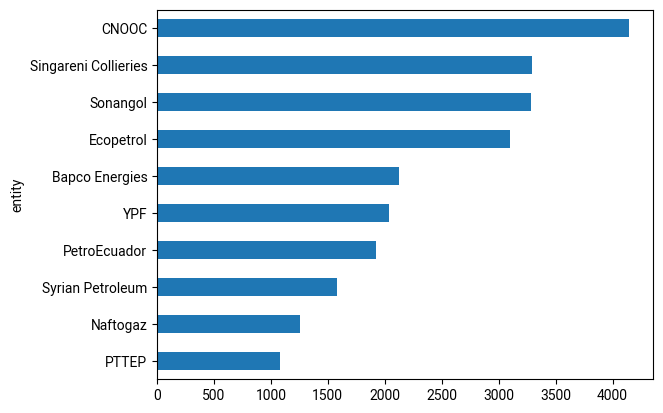

In [159]:
entity_emission = entity_df.groupby('entity')['emission'].sum().sort_values().head(10)
entity_emission.plot(kind = 'barh')

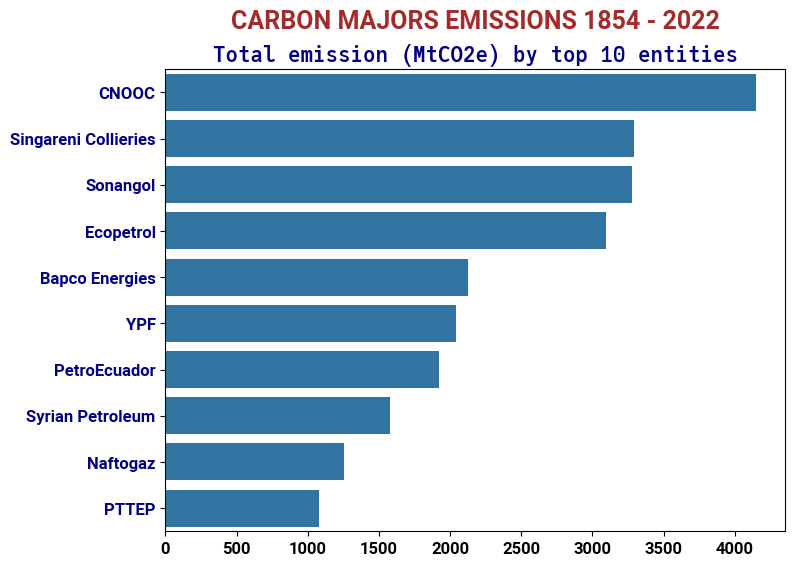

In [171]:
entity_emission_sorted = entity_emission.reset_index().sort_values('emission', ascending=False)

fig, ax = plt.subplots(figsize = (8, 6))
mid = (fig.subplotpars.right + fig.subplotpars.left)/2

sns.barplot(entity_emission_sorted, x = 'emission', y = 'entity')

ax.set_xlabel('')
ax.set_ylabel('')

ax.set_title('Total emission (MtCO2e) by top 10 entities', 
             color = 'navy', font = 'JuliaMono', fontsize = 15, weight = 'bold')

fig.suptitle("CARBON MAJORS EMISSIONS 1854 - 2022", 
             size=18, x=mid, color = 'brown', weight='bold', family = 'Roboto')

plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold", color = 'navy')
plt.show()

In [ ]:
entity_emission_sorted = entity_emission.reset_index().sort_values('emission', ascending=False)

fig, ax = plt.subplots(figsize = (8, 6))
mid = (fig.subplotpars.right + fig.subplotpars.left)/2

sns.barplot(entity_emission_sorted, x = 'emission', y = 'entity')

ax.set_xlabel('')
ax.set_ylabel('')

ax.set_title('Total emission (MtCO2e) by entity', 
             color = 'navy', font = 'JuliaMono', fontsize = 15, weight = 'bold')

fig.suptitle("CARBON MAJORS EMISSIONS 1854 - 2022", 
             size=18, x=mid, color = 'brown', weight='bold', family = 'Roboto')

plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold", color = 'navy')
plt.show()

#### Emission by  company

In [200]:
company_df = df[df.loc[:, 'type'] == 'Investor-owned Company']

<Axes: ylabel='entity'>

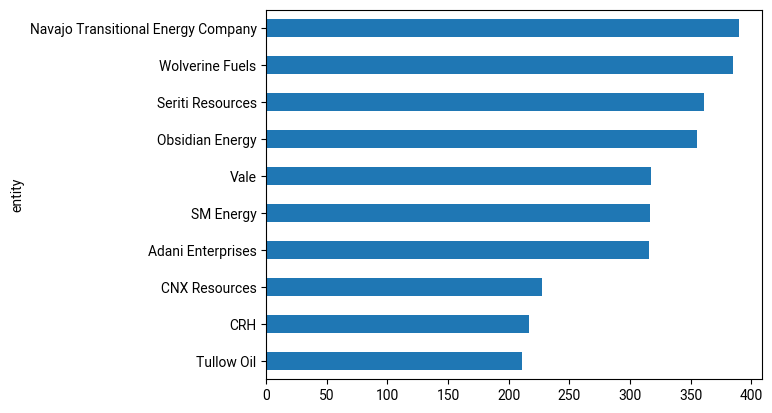

In [201]:
company_emission = company_df.groupby('entity')['emission'].sum().sort_values().head(10)
company_emission.plot(kind = 'barh')

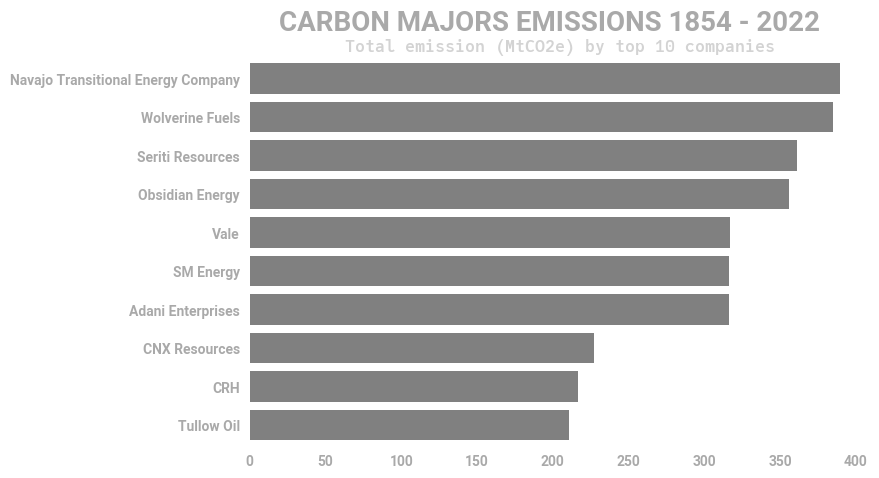

In [205]:
company_emission_sorted = company_emission.reset_index().sort_values('emission', ascending = False)

fig, ax = plt.subplots(figsize = (8, 5))

sns.barplot(company_emission_sorted, x = 'emission', y = 'entity', color = 'grey')


ax.set_xlabel('')
ax.set_ylabel('')
ax.set(frame_on=False)

ax.set_title(
    'Total emission (MtCO2e) by top 10 companies', 
    color = 'lightgrey', family = 'JuliaMono', fontsize = 12, weight = 'bold')

fig.suptitle(
    'CARBON MAJORS EMISSIONS 1854 - 2022', 
    size = 20, family = 'Roboto', weight = 'bold', color = 'darkgrey')

plt.xticks(fontweight = 'bold', fontsize = 10, color = 'darkgrey')
plt.yticks(fontweight = 'bold', fontsize = 10, color = 'darkgrey')
plt.tick_params(
    bottom = False, 
    left = False, 
    labelbottom  = True) 

plt.show()

In [180]:
company_emission_sorted

,entity,emission
9,Navajo Transitional Energy Company,389.715757
8,Wolverine Fuels,384.717350
7,Seriti Resources,361.397037
6,Obsidian Energy,355.741035
5,Vale,317.151646
4,SM Energy,316.173342
3,Adani Enterprises,316.050246
2,CNX Resources,227.074903
1,CRH,216.740085
0,Tullow Oil,210.986423
